In [9]:
import numpy as np
from decode_utils import decode, get_percent_correct_from_proba, get_fa, get_dprime


In [6]:
def select_neurons(ev, selected_rates):  
    print(ev.shape, selected_rates.shape)  
    selected_rates = np.array(selected_rates[:, :ev.shape[0]])  
    best_neurons = selected_rates[:,ev > np.nanpercentile(ev, 80, axis=0)]  
    worst_neurons = selected_rates[:,ev < np.nanpercentile(ev, 20, axis=0)]  
    return best_neurons, worst_neurons

In [8]:
nrImages = 1320
def create_i1_i2(model_features_):
    lb = ['bear','elephant','person','car','dog','apple','chair','plane','bird','zebra']
    labels = np.repeat(lb, 132,axis=0)
    i1 = np.zeros((nrImages,20), dtype=float) 
    i2 = np.zeros((20, nrImages,len(lb)), dtype=float) 
    dp_m = np.zeros((nrImages,20), dtype=float) 
    i1[:]=np.nan 
    i2[:]=np.nan 
    for j in range(20): 
        print('nrBS: '+str(j)) 
        p = decode(model_features_,labels, seed=j, nrfolds=3) 
        pc = get_percent_correct_from_proba(p,labels, np.array(lb)) 
        i1[:,j] = np.nanmean(pc, axis=1) 
        i2[j] = pc
    return i1, i2

In [7]:
evs = np.load(f"./results_predictions/monkey2monkey/ev_nano_to_magneto.npy")
evs_m = np.load(f"./results_predictions/monkey2monkey/ev_magneto_to_nano.npy")

selected_rates_magneto = np.load('./neural_data/selected_rates_magneto.npy')
selected_rates_nano = np.load('./neural_data/selected_rates_nano.npy')

best_neurons_m, worst_neurons_m = select_neurons(evs, selected_rates_magneto)
best_neurons_n, worst_neurons_n = select_neurons(evs_m, selected_rates_nano)

(169,) (1320, 169, 70)
(107,) (1320, 107, 83)


In [ ]:
%%capture --no-display
i1_worst_m, _ = create_i1_i2(np.nanmean(worst_neurons_m, axis=2).T)
i1_worst_n, _ = create_i1_i2(np.nanmean(worst_neurons_n, axis=2).T)

np.save("./behavior/i1s_unique_magneto.npy", i1_worst_m)
np.save("./behavior/i1s_unique_nano.npy", i1_worst_n)

In [ ]:
%%capture --no-display
rng = np.random.default_rng(seed=111)
for sample_size in range(10, 30, 2):
    i1s_best_m = []
    i1s_best_n = []

    for r in range(5):
        indices_best_m = rng.choice(best_neurons_m.shape[1], size=sample_size, replace=False)
        best_neurons_m_sampled = best_neurons_m[:, indices_best_m, :]
        i1_best_m, _ = create_i1_i2(np.nanmean(best_neurons_m_sampled, axis=2).T)
        i1s_best_m.append(i1_best_m)

        indices_best_n = rng.choice(best_neurons_n.shape[1], size=sample_size, replace=False)
        best_neurons_n_sampled = best_neurons_n[:, indices_best_n, :]
        i1_best_n, _ = create_i1_i2(np.nanmean(best_neurons_n_sampled, axis=2).T)
        i1s_best_n.append(i1_best_n)

    i1s_best_m = np.array(i1s_best_m)
    i1s_best_n = np.array(i1s_best_n)

    np.save(f"./behavior/i1s_common_magneto_{sample_size}.npy", i1s_best_m)
    np.save(f"./behavior/i1s_common_nano_{sample_size}.npy", i1s_best_n)



In [ ]:
i1_worst_m = np.load("./behavior/i1s_unique_magneto.npy")
i1_worst_n = np.load("./behavior/i1s_unique_nano.npy")

In [13]:
import matplotlib.pyplot as plt
from figure_utils import journal_figure

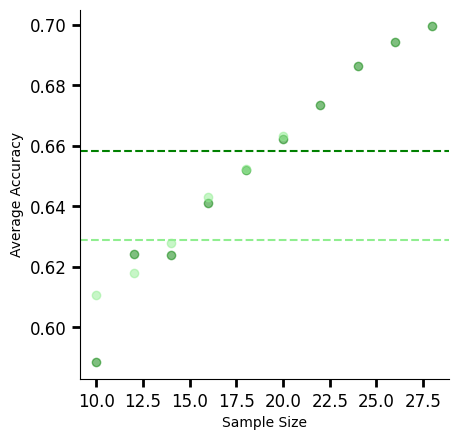

In [ ]:
plt.axhline(i1_worst_m.mean(), color='green', linestyle='--', label='Unique Magneto')
plt.axhline(i1_worst_n.mean(), color='lightgreen', linestyle='--', label='Unique Nano')
for sample_size in range(10, 30, 2):
    i1s_best_m = np.load(f"./behavior/i1s_common_magneto_{sample_size}.npy")
    
    plt.scatter(sample_size, np.nanmean(i1s_best_m), label=f'Common Magneto {sample_size}', color='green', alpha=0.5)

for sample_size in range(10, 22, 2):
    i1s_best_n = np.load(f"./behavior/i1s_common_nano_{sample_size}.npy")

    plt.scatter(sample_size, np.nanmean(i1s_best_n), label=f'Common Nano {sample_size}', color='lightgreen', alpha=0.5)
plt.xlabel("Sample Size")
plt.ylabel("Average Accuracy")
plt.legend()
journal_figure()